<a href="https://colab.research.google.com/github/tesscstanley/NEUR265/blob/main/265_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
# Purpose: to compare RIPA tTau and average GFAP positive cells across CERAD scores
# DV1 = total RIPA tTau     DV2 = average GFAP positive cell area      IV = CERAD scores

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [104]:
# data1 = tTau and GFAP data with CERAD scores
data1 = pd.read_csv('https://raw.githubusercontent.com/tesscstanley/NEUR265/main/Version%20C%3A%20aSyn%20%2B%20GFAP%20%2B%20RIPA%20tTau%20%2B%20CERAD.csv')
data1.dropna()


,Unnamed: 0,Donor ID,average aSyn positive cell area,average GFAP positive branch area,CERAD score,ripa tTau_Grey matter
0,8.0,H19.33.004,0.000000,1227.289319,Absent,1552.414737
1,27.0,H20.33.001,0.000000,212.237484,Sparse,756.090526
2,28.0,H20.33.002,0.000000,275.166381,Absent,313.525263
3,15.0,H20.33.004,0.000000,831.295901,Frequent,318.528421
4,21.0,H20.33.005,0.000000,476.614806,Moderate,107.348421
...,...,...,...,...,...,...
79,83.0,H21.33.043,0.000000,417.980886,Sparse,611.000000
80,65.0,H21.33.044,0.000000,1149.544333,Frequent,417.894737
81,2.0,H21.33.045,0.000000,338.602933,Frequent,147.565263
82,5.0,H21.33.046,25.772586,1326.152528,Moderate,1124.777383


In [105]:
# Sorting data across the CERAD scores: absent, sparse, moderate, frequent
absent = data1.loc[data1['CERAD score']=='Absent']
sparse = data1.loc[data1['CERAD score']=='Sparse']
moderate = data1.loc[data1['CERAD score']=='Moderate']
frequent = data1.loc[data1['CERAD score']=='Frequent']

# A) Distribution for tTau

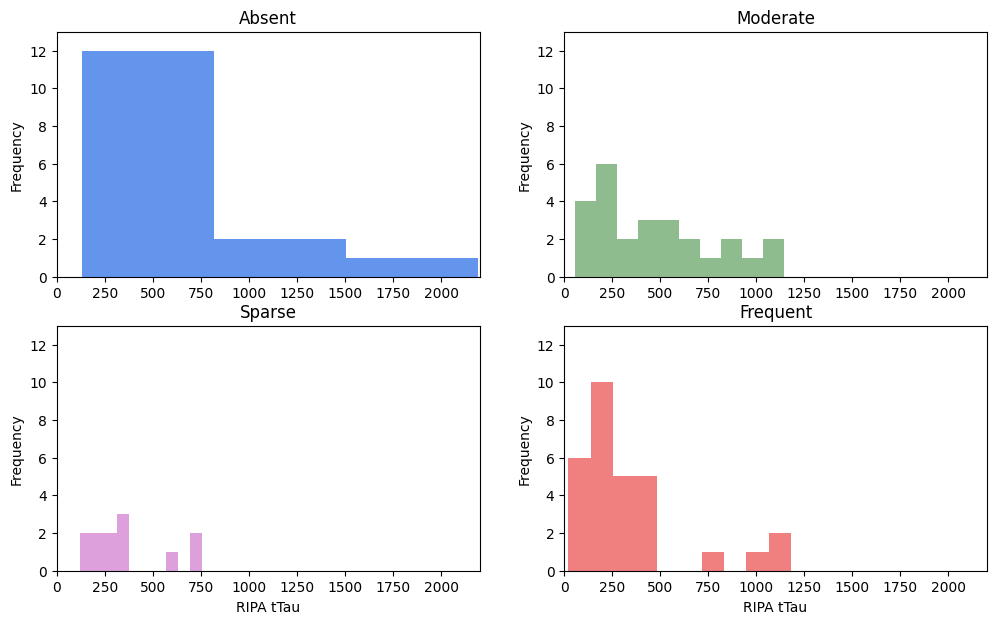

In [106]:
# A) Visualizing the distribution of tTau area analyzed in each CERAD Score

fig, ax = plt.subplots(2,2,figsize=(12,7))

CERADscores = data1['CERAD score'].unique()
for Cscore in CERADscores:

    cs = data1[data1['CERAD score'] == Cscore]
    
    if Cscore == 'Absent':
      ax[0,0].hist(cs['ripa tTau_Grey matter'],
                label=Cscore,color="cornflowerblue")
      ax[0,0].set_title('Absent')
      ax[0,0].set_ylabel('Frequency')
      ax[0,0].set_xlim(0,2200)
      ax[0,0].set_ylim(0,13)
      
    elif Cscore == 'Sparse':
      ax[1,0].hist(cs['ripa tTau_Grey matter'],
                label=Cscore,color="plum")
      ax[1,0].set_title('Sparse')
      ax[1,0].set_ylabel('Frequency')
      ax[1,0].set_xlabel('RIPA tTau')
      ax[1,0].set_xlim(0,2200)
      ax[1,0].set_ylim(0,13)
      
    elif Cscore == 'Moderate':
      ax[0,1].hist(cs['ripa tTau_Grey matter'],
                label=Cscore,color="darkseagreen")
      ax[0,1].set_title('Moderate')
      ax[0,1].set_ylabel('Frequency')
      ax[0,1].set_xlim(0,2200)
      ax[0,1].set_ylim(0,13)
      
      
    elif Cscore == 'Frequent':
      ax[1,1].hist(cs['ripa tTau_Grey matter'],
                label=Cscore,color="lightcoral")
      ax[1,1].set_title('Frequent')
      ax[1,1].set_ylabel('Frequency')
      ax[1,1].set_xlabel('RIPA tTau')
      ax[1,1].set_xlim(0,2200)
      ax[1,1].set_ylim(0,13)

In [107]:
# Skewness test for RIPA tTau distribution
print(stats.skewtest(absent['ripa tTau_Grey matter']))
print(stats.skewtest(sparse['ripa tTau_Grey matter']))
print(stats.skewtest(moderate['ripa tTau_Grey matter']))
print(stats.skewtest(frequent['ripa tTau_Grey matter']))

SkewtestResult(statistic=4.715263536915866, pvalue=2.4139809633626764e-06)
SkewtestResult(statistic=1.5729640854909186, pvalue=0.11572713448216787)
SkewtestResult(statistic=1.4900077331116293, pvalue=0.13622220262507734)
SkewtestResult(statistic=3.6456573786676287, pvalue=0.0002667091301406191)


# B) Distribution of CERAD Scores

Absent      16
Sparse      12
Moderate    26
Frequent    30
Name: CERAD score, dtype: int64


Text(0.5, 1.0, 'Distribution of CERAD Scores')

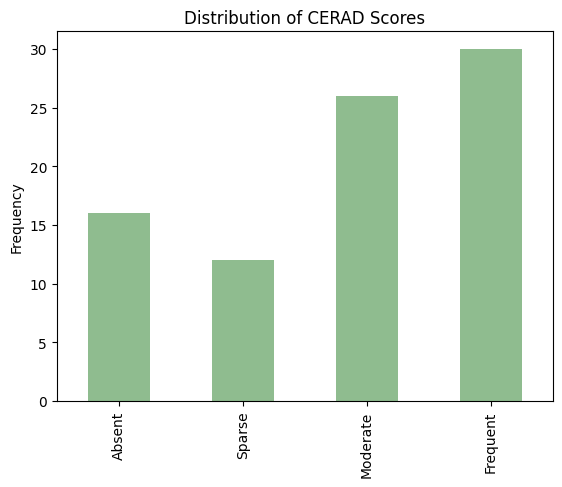

In [108]:
# Creating a bar graph to visualize the distribution of data points across CERAD scores as groups
#2/27
print(data1['CERAD score'].value_counts().loc[['Absent','Sparse','Moderate','Frequent']])
data1['CERAD score'].value_counts().loc[['Absent','Sparse','Moderate','Frequent']].plot(kind='bar', color='darkseagreen')
plt.ylabel('Frequency')
plt.title('Distribution of CERAD Scores')

#### B) description of how many observations of each group are in your dataset 
Based on the graph depicting the distribution of CERAD Scores, the number of individuals who recieved a score of 'Absent' was 16 and the number of individuals with a 'Sparse' score was 12. Next, 26 individuals received a score of 'Moderate' and 30 individuals received a score of 'Frequent'. Fewer individuals received scores of 'Absent' and 'Sparse' than 'Moderate' and 'Frequent', which demonstrates that a larger portion of the sample had high CERAD scores, indicating a higher measure of neuritic plaques and greater probability of AD. 

# C) CERAD Scatter plot

(0.0, 7100.0)

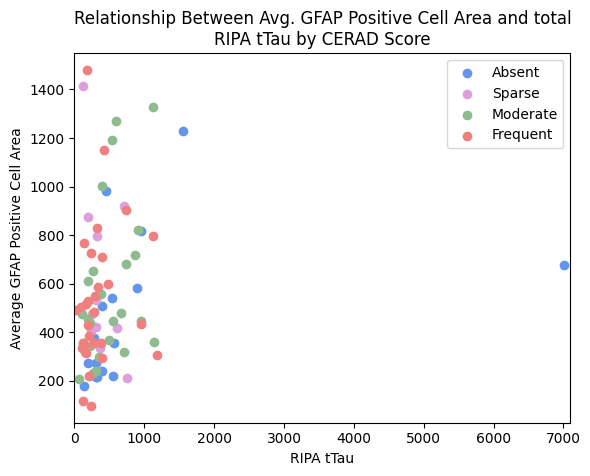

In [109]:
# Creating a scatter plot to show the relationship between the total RIPA tTau and average GFAP positve cell area, with dots color-coded by CERAD score
#2/15
from textwrap import wrap
from scipy.stats import pearsonr
plt.scatter(absent['ripa tTau_Grey matter'],absent['average GFAP positive branch area'], color = 'cornflowerblue')
plt.scatter(sparse['ripa tTau_Grey matter'], sparse['average GFAP positive branch area'], color = 'plum')
plt.scatter(moderate['ripa tTau_Grey matter'], moderate['average GFAP positive branch area'], color = 'darkseagreen')
plt.scatter(frequent['ripa tTau_Grey matter'], frequent['average GFAP positive branch area'], color = 'lightcoral')

plt.ylabel('Average GFAP Positive Cell Area')
plt.xlabel('RIPA tTau')
plt.legend(['Absent','Sparse','Moderate','Frequent'])
plt.title("\n".join(wrap('Relationship Between Avg. GFAP Positive Cell Area and total RIPA tTau by CERAD Score', 60)))
plt.xlim(0,7100)


In [110]:
print(pearsonr(absent['ripa tTau_Grey matter'],absent['average GFAP positive branch area']))
print(pearsonr(sparse['ripa tTau_Grey matter'],sparse['average GFAP positive branch area']))
print(pearsonr(moderate['ripa tTau_Grey matter'],moderate['average GFAP positive branch area']))
print(pearsonr(frequent['ripa tTau_Grey matter'],frequent['average GFAP positive branch area']))

PearsonRResult(statistic=0.3329154195838462, pvalue=0.2076836014705582)
PearsonRResult(statistic=-0.2923387258960439, pvalue=0.3564977935563815)
PearsonRResult(statistic=0.42274015898180695, pvalue=0.03143050302797942)
PearsonRResult(statistic=0.12748285624612543, pvalue=0.5020104079023447)


###  a description of the correlation between your variables, and how that correlation might differ by group for “c"

This scatter plot appears linear when accounting for the outlier in CERAD Score Absent, however, when this outlier is removed the scatter plot appears to have a more distinct positive correlation between average GFAP positive cell area and RIPA tTau. Specifically, higher RIPA tTau values are correlated with higher GFAP values. Both the 'Absent' and 'Sparse' values are more concentrated in low RIPA tTau and GFAP values with some distinct outliers while the 'Moderate' and 'Frequent' scores show a stronger positive relationship between RIPA tTau and GFAP

# D) Boxplot for tTau

(0.0, 2000.0)

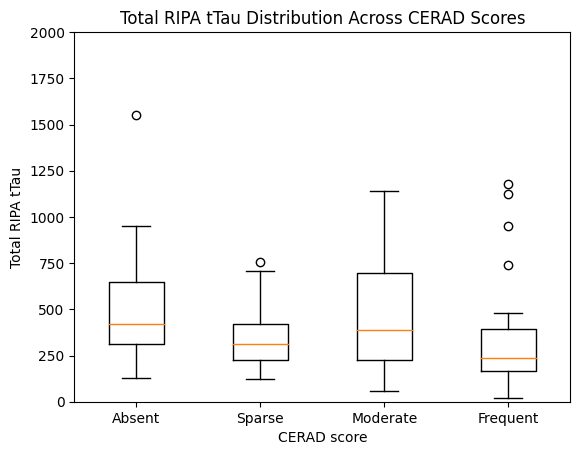

In [111]:
# Creating a boxplot visualizing how RIPA tTau area analyzed distribution differs between CERAD scores

absent_data = data1[data1['CERAD score'] == 'Absent']
absent_bp = absent_data['ripa tTau_Grey matter']

sparse_data = data1[data1['CERAD score'] == 'Sparse']
sparse_bp = sparse_data['ripa tTau_Grey matter']

moderate_data = data1[data1['CERAD score'] == 'Moderate']
moderate_bp = moderate_data['ripa tTau_Grey matter']

frequent_data = data1[data1['CERAD score'] =='Frequent']
frequent_bp = frequent_data['ripa tTau_Grey matter']

#2/27
tTauboxdata = [absent_bp.tolist(),sparse_bp.tolist(),moderate_bp.tolist(),frequent_bp.tolist()]
plt.boxplot(tTauboxdata)
plt.xticks([1,2,3,4],['Absent','Sparse','Moderate','Frequent'])
plt.xlabel('CERAD score')
plt.ylabel('Total RIPA tTau')
plt.title('Total RIPA tTau Distribution Across CERAD Scores')
plt.ylim(0,2000)

In [112]:
from scipy import stats
stats.f_oneway(data1['ripa tTau_Grey matter'][data1['CERAD score'] == 'Absent'],
               data1['ripa tTau_Grey matter'][data1['CERAD score'] == 'Sparse'],
               data1['ripa tTau_Grey matter'][data1['CERAD score'] == 'Moderate'],
               data1['ripa tTau_Grey matter'][data1['CERAD score'] == 'Frequent'])

F_onewayResult(statistic=2.245344255445912, pvalue=0.08937265002699017)

#Data/Graphs for GFAP
### A) Distribution of GFAP across CERAD

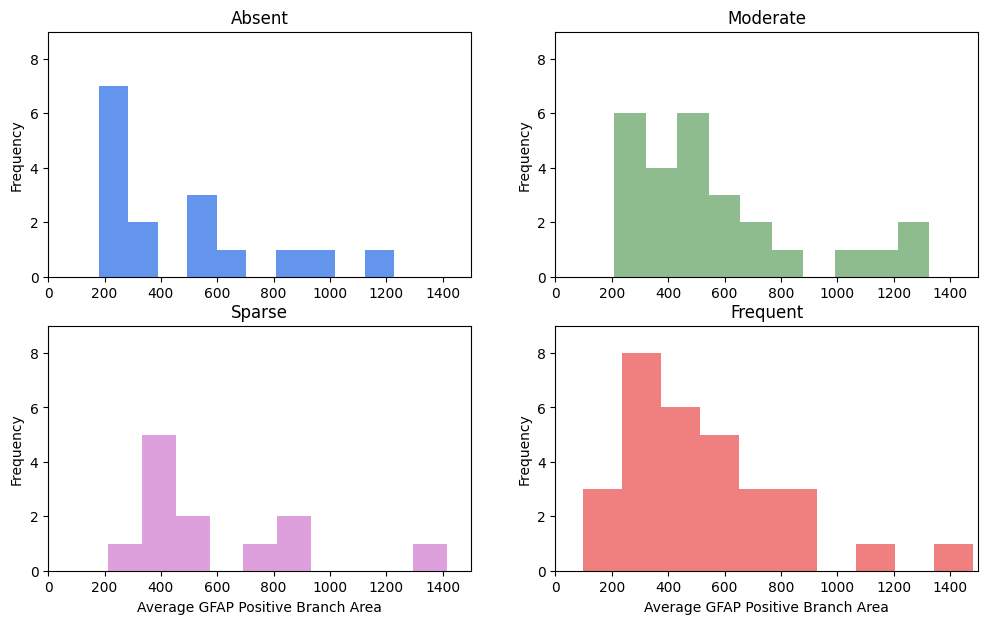

In [113]:
# Visualizing the distribution of average GFAP positive branch area in each CERAD Score

fig, ax = plt.subplots(2,2,figsize=(12,7))

CERADscores = data1['CERAD score'].unique()
for Cscore in CERADscores:
#2/20 + 2/27
    cs = data1[data1['CERAD score'] == Cscore]
    
    if Cscore == 'Absent':
      ax[0,0].hist(cs['average GFAP positive branch area'],
                label=Cscore,color="cornflowerblue")
      ax[0,0].set_title('Absent')
      ax[0,0].set_ylabel('Frequency')
      ax[0,0].set_xlim(0,1500)
      ax[0,0].set_ylim(0,9.0)
      
    elif Cscore == 'Sparse':
      ax[1,0].hist(cs['average GFAP positive branch area'],
                label=Cscore,color="plum")
      ax[1,0].set_title('Sparse')
      ax[1,0].set_ylabel('Frequency')
      ax[1,0].set_xlabel('Average GFAP Positive Branch Area')
      ax[1,0].set_xlim(0,1500)
      ax[1,0].set_ylim(0,9.0)
      
    elif Cscore == 'Moderate':
      ax[0,1].hist(cs['average GFAP positive branch area'],
                label=Cscore,color="darkseagreen")
      ax[0,1].set_title('Moderate')
      ax[0,1].set_ylabel('Frequency')
      ax[0,1].set_xlim(0,1500)
      ax[0,1].set_ylim(0,9.0)
      
      
    elif Cscore == 'Frequent':
      ax[1,1].hist(cs['average GFAP positive branch area'],
                label=Cscore,color="lightcoral")
      ax[1,1].set_title('Frequent')
      ax[1,1].set_ylabel('Frequency')
      ax[1,1].set_xlabel('Average GFAP Positive Branch Area')
      ax[1,1].set_xlim(0,1500)
      ax[1,1].set_ylim(0,9.0)

  

In [114]:
# Skewness test for GFAP distribution
print(stats.skewtest(absent['average GFAP positive branch area']))
print(stats.skewtest(sparse['average GFAP positive branch area']))
print(stats.skewtest(moderate['average GFAP positive branch area']))
print(stats.skewtest(frequent['average GFAP positive branch area']))

SkewtestResult(statistic=2.092705513717894, pvalue=0.03637545076367838)
SkewtestResult(statistic=2.1044549066019536, pvalue=0.0353387841900614)
SkewtestResult(statistic=2.5955971832296014, pvalue=0.009442669514885609)
SkewtestResult(statistic=2.8891263676331773, pvalue=0.0038631379393828783)


# D) Boxplot for GFAP 

Text(0.5, 1.0, 'Average GFAP Distribution Across CERAD Scores')

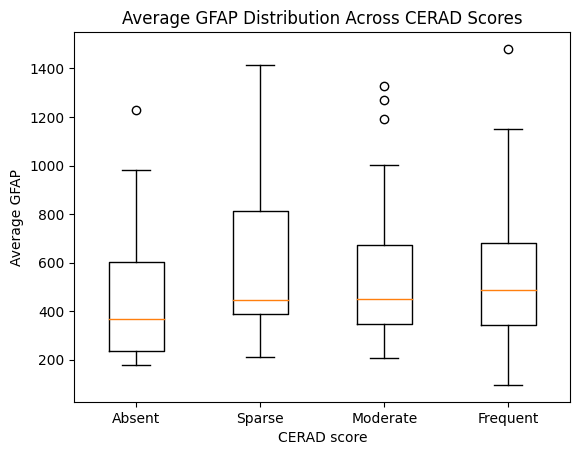

In [115]:
# Creating a boxplot visualizing how average GFAP positive branch area distribution differs between CERAD scores


absent_data = data1[data1['CERAD score'] == 'Absent']
absent_bp = absent_data['average GFAP positive branch area']

sparse_data = data1[data1['CERAD score'] == 'Sparse']
sparse_bp = sparse_data['average GFAP positive branch area']


moderate_data = data1[data1['CERAD score'] == 'Moderate']
moderate_bp = moderate_data['average GFAP positive branch area']

frequent_data = data1[data1['CERAD score'] =='Frequent']
frequent_bp = frequent_data['average GFAP positive branch area']

#2/27
GFAPboxdata = [absent_bp.tolist(),sparse_bp.tolist(),moderate_bp.tolist(),frequent_bp.tolist()]
plt.boxplot(GFAPboxdata)
plt.xticks([1,2,3,4],['Absent','Sparse','Moderate','Frequent'])
plt.xlabel('CERAD score')
plt.ylabel('Average GFAP')
plt.title('Average GFAP Distribution Across CERAD Scores')

In [116]:
from scipy import stats
stats.f_oneway(data1['average GFAP positive branch area'][data1['CERAD score'] == 'Absent'],
               data1['average GFAP positive branch area'][data1['CERAD score'] == 'Sparse'],
               data1['average GFAP positive branch area'][data1['CERAD score'] == 'Moderate'],
               data1['average GFAP positive branch area'][data1['CERAD score'] == 'Frequent'])

F_onewayResult(statistic=0.3691232794223452, pvalue=0.7754796588756357)

# Average AT8 positive area and greay matter RiPA p-Tau across Braak scores.


## Graphs for WHOLE Data

In [117]:
# Purpose: to compare average AT8 positive cell area and RIPA pTau across Braak stages
# DV1 = average AT8 positive cell area        DV2 = RIPA pTau expression in gray matter   IV = Braak stages

In [118]:
# data2 = AT8 and RIPA pTau data in Braak stages
data2 = pd.read_csv('https://raw.githubusercontent.com/tesscstanley/NEUR265/main/AT8%20%2B%20pTau%20%2B%20Braak3.csv')
data2.dropna()

,Unnamed: 0,Donor ID,average AT8 positive cell area,RIPA pTau,Braak stages,3 Braak stages
0,8.0,H19.33.004,0.000000,1.901053,Braak IV,Braak Mid
1,27.0,H20.33.001,102.924044,2.737895,Braak IV,Braak Mid
2,28.0,H20.33.002,26.316354,2.615789,Braak IV,Braak Mid
3,15.0,H20.33.004,80.896970,7.412632,Braak V,Braak Late
4,21.0,H20.33.005,35.419410,1.327368,Braak IV,Braak Mid
...,...,...,...,...,...,...
79,83.0,H21.33.043,77.544874,4.404211,Braak II,Braak Early
80,65.0,H21.33.044,82.742644,3.662105,Braak VI,Braak Late
81,2.0,H21.33.045,69.949808,11.489474,Braak VI,Braak Late
82,5.0,H21.33.046,83.979676,3.129474,Braak V,Braak Late


In [119]:
# Sorting data across the Braak stages: 0, I, II, III, IV, V, VI
BEarly = data2.loc[data2['3 Braak stages']=='Braak Early']
BMid = data2.loc[data2['3 Braak stages']=='Braak Mid']
BLate = data2.loc[data2['3 Braak stages']=='Braak Late']

Braak Early     8
Braak Mid      27
Braak Late     49
Name: 3 Braak stages, dtype: int64


Text(0.5, 1.0, 'Distribution of Braak Stages')

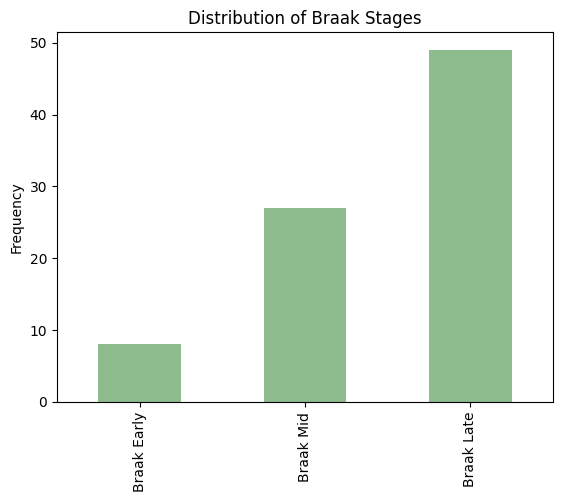

In [120]:
# Creating a bar graph to visualize the distribution of data points across Braak stages as groups
#2/27
print(data2['3 Braak stages'].value_counts().loc[['Braak Early','Braak Mid','Braak Late']])
data2['3 Braak stages'].value_counts().loc[['Braak Early','Braak Mid','Braak Late']].plot(kind='bar', color='darkseagreen')
# Braak I was not included as no sample was in the Braak I stage
plt.ylabel('Frequency')
plt.title('Distribution of Braak Stages')

#### B) description of how many observations of each group are in your dataset 
Based on the graph depicting the distribution of Braak stages, the number of individuals in stage 0 was 2, then 4 individuals were in stage II and 6 individuals in stage III. In the higher stages, 23 individuals were at Braak stage IV, 34 individuals at Braak stage V, and 15 individuals at Braak stage VI. These stages were then grouped into three categories, 8 samples in Early (containing Braak stages 0-II), 27 samples in Mid (containing Braak stages III and IV), and 49 samples in 5Late (containing Braak stages V and VI). This higher number of individuals in late stages suggests the sample contained a large number of patients with symptomatic AD, compared to the fewer number of people in Early to Mid stages, where individuals can be non-AD or pre-AD patients. 


# C) scatter plot

Text(0.5, 1.0, 'Relationship Between Avg. AT8 Positive Cell Area and RIPA\npTau in Grey Matter by Braak Stage')

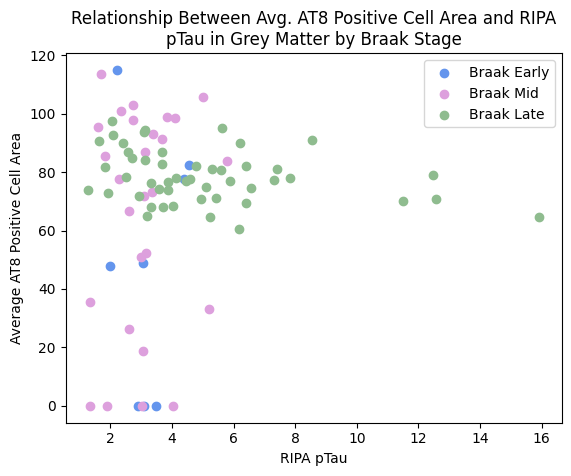

In [121]:
# Creating a scatter plot to show the relationship between the verage AT8 positive cell area and RIPA pTau, with dots color-coded by Braak stages
#2/15

plt.scatter(BEarly['RIPA pTau'], BEarly['average AT8 positive cell area'], color = 'cornflowerblue')
plt.scatter(BMid['RIPA pTau'],BMid['average AT8 positive cell area'], color = 'plum')
plt.scatter(BLate['RIPA pTau'],BLate['average AT8 positive cell area'], color = 'darkseagreen')

plt.ylabel('Average AT8 Positive Cell Area')
plt.xlabel('RIPA pTau')
plt.legend(['Braak Early','Braak Mid','Braak Late'])
plt.title("\n".join(wrap('Relationship Between Avg. AT8 Positive Cell Area and RIPA pTau in Grey Matter by Braak Stage', 60)))

In [122]:
print(pearsonr(BEarly['RIPA pTau'],BEarly['average AT8 positive cell area']))
print(pearsonr(BMid['RIPA pTau'],BMid['average AT8 positive cell area']))
print(pearsonr(BLate['RIPA pTau'],BLate['average AT8 positive cell area']))

PearsonRResult(statistic=0.08099087700538163, pvalue=0.848804875622335)
PearsonRResult(statistic=0.13596352051575675, pvalue=0.4989086630914407)
PearsonRResult(statistic=-0.3036682488444307, pvalue=0.033906986234019165)


### C) a description of the correlation between your variables, and how that correlation might differ by group for “c"

Based on the scatter plot depicting the relationship between the average AT8 positive cell area and RIPA pTau, there is a notable concentration of data points at lower RIPA pTau values and higher AT8 values. Values for Early and Mid Braak stages display no particular pattern of expression, however, values for Late Braak stages display concentration of data points at lower RIPA pTau values and higher AT8 values, signifying a negative relationship between RIPA pTau and AT8 expression in later stages of disease progression. Furthermore, this is validated by a pearsonr result showing a statistic of -0.3037 with a p-value of 0.034. 


## AT8 data

Text(0.5, 1.0, 'Average AT8 Positive Cell Area Distribution Across Braak Staging')

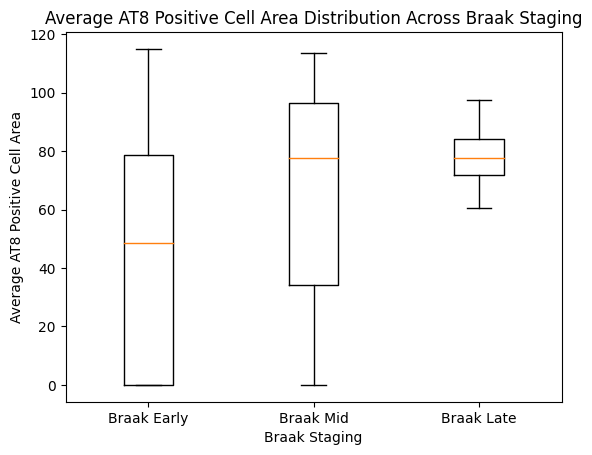

In [123]:
# Creating a boxplot visualizing how average AT8 positive cell area distribution differs between Braak staging

BE_data = data2[data2['3 Braak stages'] == 'Braak Early']
BE_bp = BE_data['average AT8 positive cell area']

BM_data = data2[data2['3 Braak stages'] == 'Braak Mid']
BM_bp = BM_data['average AT8 positive cell area']

BL_data = data2[data2['3 Braak stages'] == 'Braak Late']
BL_bp = BL_data['average AT8 positive cell area']


#2/27
AT8boxdata = [BE_bp.tolist(),BM_bp.tolist(),BL_bp.tolist()]
plt.boxplot(AT8boxdata)
plt.xticks([1,2,3],['Braak Early','Braak Mid','Braak Late'])
plt.xlabel('Braak Staging')
plt.ylabel('Average AT8 Positive Cell Area')
plt.title('Average AT8 Positive Cell Area Distribution Across Braak Staging')

In [124]:
stats.f_oneway(data2['average AT8 positive cell area'][data2['3 Braak stages'] == 'Braak Early'],
               data2['average AT8 positive cell area'][data2['3 Braak stages'] == 'Braak Mid'],
               data2['average AT8 positive cell area'][data2['3 Braak stages'] == 'Braak Late'])

F_onewayResult(statistic=6.398737560569039, pvalue=0.0026296731361721668)

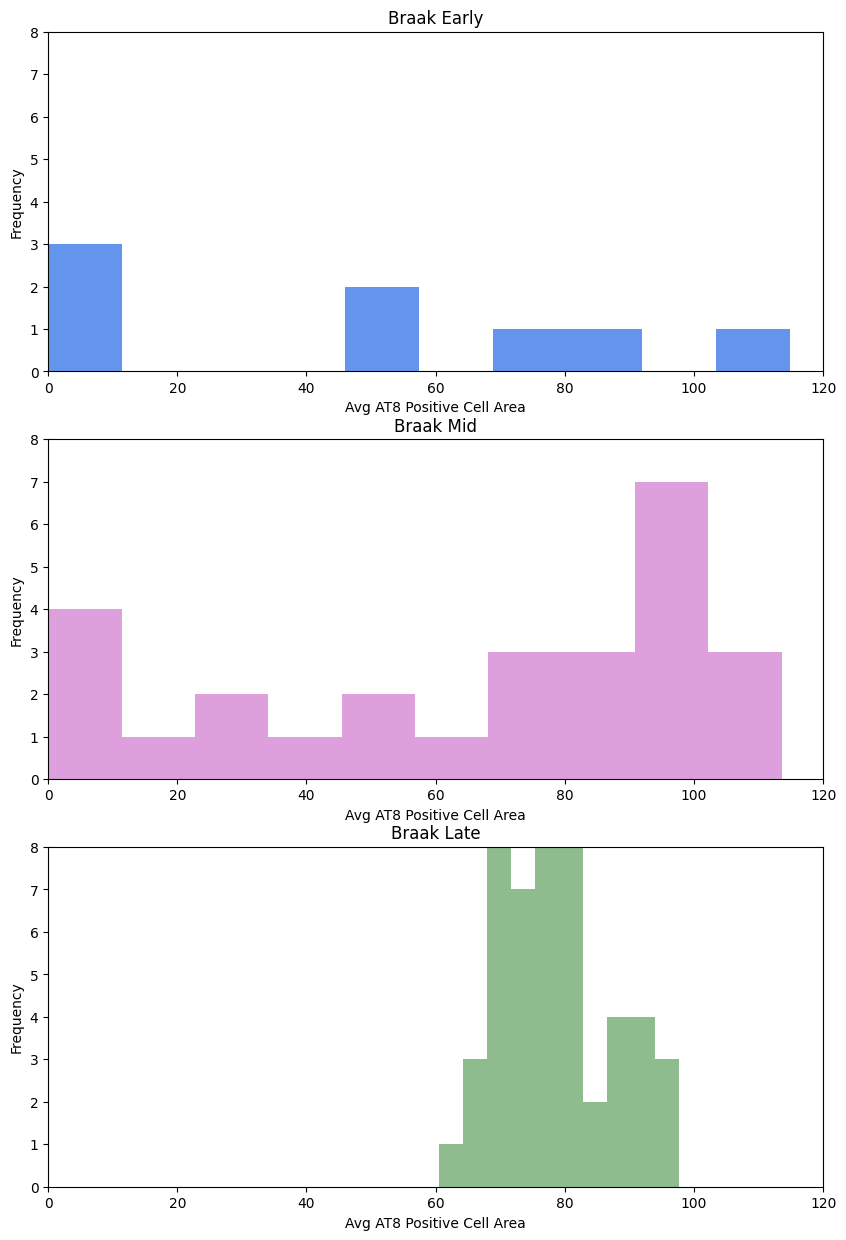

In [125]:
# Visualizing the distribution of average AT8 positive cell area in each Braak stage

fig, ax = plt.subplots(3,1,figsize=(10,15))

Braakstages = data2['3 Braak stages'].unique()
for Bstage in Braakstages:

    bs = data2[data2['3 Braak stages'] == Bstage]
    
    if Bstage == 'Braak Early':
      ax[0].hist(bs['average AT8 positive cell area'],
                label=Bstage,color="cornflowerblue")
      ax[0].set_title('Braak Early')
      ax[0].set_ylabel('Frequency')
      ax[0].set_xlabel('Avg AT8 Positive Cell Area')
      ax[0].set_xlim(0,120)
      ax[0].set_ylim(0,8.0)
    
    elif Bstage == 'Braak Mid':
      ax[1].hist(bs['average AT8 positive cell area'],
                label=Bstage,color="plum")
      ax[1].set_title('Braak Mid')
      ax[1].set_ylabel('Frequency')
      ax[1].set_xlabel('Avg AT8 Positive Cell Area')
      ax[1].set_xlim(0,120)
      ax[1].set_ylim(0,8.0)
   
    elif Bstage == 'Braak Late':
      ax[2].hist(bs['average AT8 positive cell area'],
                label=Bstage,color="darkseagreen")
      ax[2].set_title('Braak Late')
      ax[2].set_ylabel('Frequency')
      ax[2].set_xlabel('Avg AT8 Positive Cell Area')
      ax[2].set_xlim(0,120)
      ax[2].set_ylim(0,8.0)


In [126]:
print(stats.skewtest(BEarly['average AT8 positive cell area']))
print(stats.skewtest(BMid['average AT8 positive cell area']))
print(stats.skewtest(BLate['average AT8 positive cell area']))

SkewtestResult(statistic=0.2940291417863853, pvalue=0.768735635175803)
SkewtestResult(statistic=-1.5042605370503306, pvalue=0.13251429586940472)
SkewtestResult(statistic=0.8008454202302973, pvalue=0.4232211406315125)


# RIPA pTau Data

Text(0.5, 1.0, 'Average RIPA pTau Distribution Across Braak Staging')

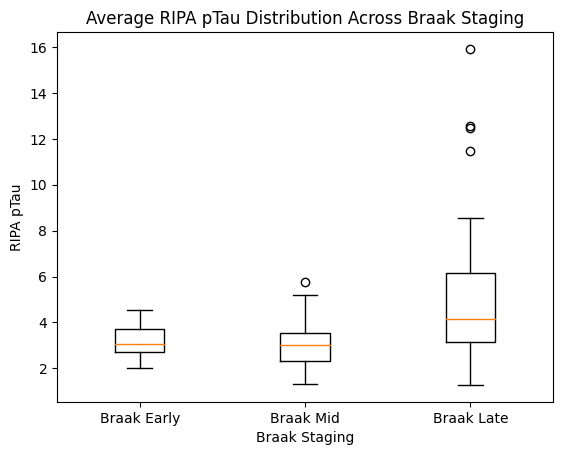

In [127]:
# Creating a boxplot visualizing how RIPA pTau distribution differs between Braak staging

BE_data = data2[data2['3 Braak stages'] == 'Braak Early']
BE_bp = BE_data['RIPA pTau']

BM_data = data2[data2['3 Braak stages'] == 'Braak Mid']
BM_bp = BM_data['RIPA pTau']

BL_data = data2[data2['3 Braak stages'] == 'Braak Late']
BL_bp = BL_data['RIPA pTau']


#2/27
pTauboxdata = [BE_bp.tolist(),BM_bp.tolist(),BL_bp.tolist()]
plt.boxplot(pTauboxdata)
plt.xticks([1,2,3],['Braak Early','Braak Mid','Braak Late'])
plt.xlabel('Braak Staging')
plt.ylabel('RIPA pTau')
plt.title('Average RIPA pTau Distribution Across Braak Staging')

In [128]:
stats.f_oneway(data2['RIPA pTau'][data2['3 Braak stages'] == 'Braak Early'],
               data2['RIPA pTau'][data2['3 Braak stages'] == 'Braak Mid'],
               data2['RIPA pTau'][data2['3 Braak stages'] == 'Braak Late'])

F_onewayResult(statistic=6.555043323739954, pvalue=0.0022981493404281494)

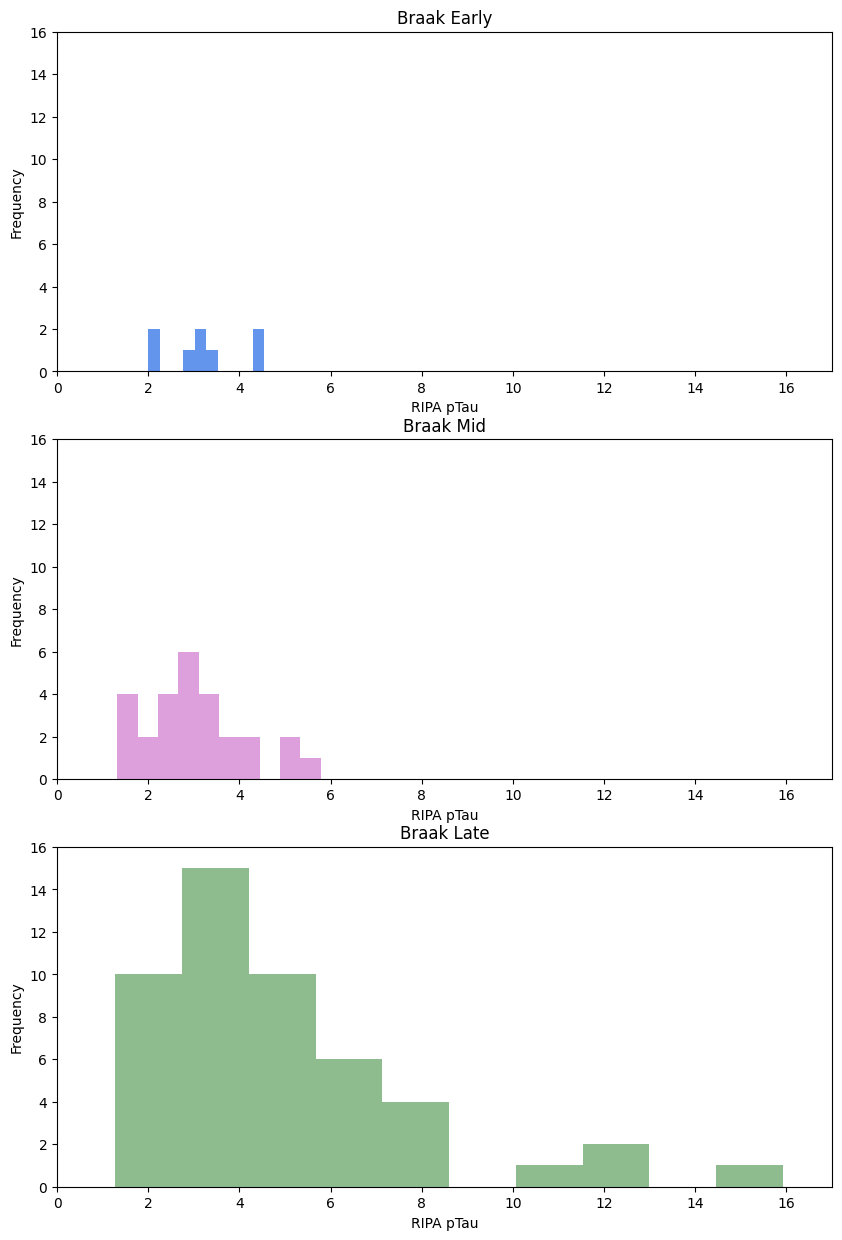

In [129]:
# Visualizing the distribution of RIPA pTau in each Braak stage

fig, ax = plt.subplots(3,1,figsize=(10,15))

Braakstages = data2['3 Braak stages'].unique()
for Bstage in Braakstages:

    bs = data2[data2['3 Braak stages'] == Bstage]
    
    if Bstage == 'Braak Early':
      ax[0].hist(bs['RIPA pTau'],
                label=Bstage,color="cornflowerblue")
      ax[0].set_title('Braak Early')
      ax[0].set_ylabel('Frequency')
      ax[0].set_xlabel('RIPA pTau')
      ax[0].set_xlim(0,17)
      ax[0].set_ylim(0,16.0)
    
    elif Bstage == 'Braak Mid':
      ax[1].hist(bs['RIPA pTau'],
                label=Bstage,color="plum")
      ax[1].set_title('Braak Mid')
      ax[1].set_ylabel('Frequency')
      ax[1].set_xlabel('RIPA pTau')
      ax[1].set_xlim(0,17)
      ax[1].set_ylim(0,16.0)
   
    elif Bstage == 'Braak Late':
      ax[2].hist(bs['RIPA pTau'],
                label=Bstage,color="darkseagreen")
      ax[2].set_title('Braak Late')
      ax[2].set_ylabel('Frequency')
      ax[2].set_xlabel('RIPA pTau')
      ax[2].set_xlim(0,17)
      ax[2].set_ylim(0,16.0)


In [130]:
print(stats.skewtest(BEarly['RIPA pTau']))
print(stats.skewtest(BMid['RIPA pTau']))
print(stats.skewtest(BLate['RIPA pTau']))

SkewtestResult(statistic=0.4279454325767834, pvalue=0.6686908487523935)
SkewtestResult(statistic=1.4361141119993128, pvalue=0.1509698731294799)
SkewtestResult(statistic=4.097150696622967, pvalue=4.182666297795903e-05)
